In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.keras.backend import one_hot #session run이 필요하다. 
from tensorflow.keras.utils import to_categorical #session이 필요 없기 때문에 이걸 쓰면 된다. 굳이 one-hot으로 변경 안해도 된다.
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels) = load_data()

In [3]:
data = (train_images,train_labels),(test_images,test_labels)

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
sess = tf.Session()

In [6]:
train_images=train_images.reshape(60000,784)

In [7]:
test_images=test_images.reshape(10000,784)

In [8]:
x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels

In [9]:
t= one_hot(train_labels,10)
y_train = sess.run(t)

In [10]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.constant(y_train, tf.float32)

In [11]:
w1 = tf.get_variable('w1',[784,100], initializer=tf.contrib.layers.xavier_initializer()) #deep-learning #xavier 초기화 해줌
b1 = tf.get_variable('b1',[100], initializer=tf.contrib.layers.xavier_initializer())
z1 = tf.matmul(x,w1) + b1 #(784,100)
lay1 = tf.nn.softmax(z1)  #학습이 안되면 중간중간 RELu를 넣어주어야 한다. 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [12]:
w2 = tf.get_variable('w2',[100,10], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable('b2',[10], initializer=tf.contrib.layers.xavier_initializer())
z2 = tf.matmul(lay1,w2) + b2 
hx = tf.nn.softmax(z2) #맨 마지막에는 무조건 softmax가 와야한다. 

In [13]:
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=z2, labels=y)  #소프트맥스와 크로스앤트로피가 결합되어있는 것이다. 

cost = tf.reduce_mean(cost_i)

In [14]:
optimizer = tf.train.AdamOptimizer(0.1) #Learning rate
train = optimizer.minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
hist_loss =[]
patience = 16
min_delta = 0.001 #이전값과 16번 비교하여 min_delta보다 작으면 빠져나가겠다. 
pcnt = 0

In [16]:
for i in range(300):
    sess.run(train,{x:x_train}) #벼림 연산 # w = w.assign(w-0.1*g)
    c = sess.run(cost,{x:x_train}) 
    hist_loss.append( c )
    print(i, c)
    if i > 0 :
        if hist_loss[i-1]-hist_loss[i] > min_delta:
            pcnt = 0
        else:
            pcnt+= 1
        if pcnt > patience:
            print ('early stopping...')
            break

0 2.1852245
1 2.2318177
2 2.0877721
3 2.024082
4 1.9331435
5 1.8849747
6 1.8046188
7 1.7479028
8 1.6590172
9 1.6186073
10 1.5909549
11 1.5267386
12 1.4597325
13 1.4333653
14 1.3907522
15 1.3620424
16 1.3254943
17 1.2880943
18 1.2434162
19 1.3396719
20 1.2175239
21 1.2156119
22 1.2054018
23 1.2390938
24 1.3220477
25 1.2827333
26 1.2114106
27 1.1737401
28 1.1498218
29 1.1540906
30 1.1515305
31 1.1526933
32 1.1671318
33 1.1842172
34 1.1600788
35 1.1879221
36 1.1188792
37 1.1130383
38 1.1444037
39 1.1752294
40 1.170153
41 1.1823202
42 1.1579018
43 1.124675
44 1.0723238
45 1.0672625
46 1.08227
47 1.1000633
48 1.0903287
49 1.0766163
50 1.0482311
51 1.0292138
52 1.0163743
53 1.015186
54 1.0268973
55 1.0482608
56 1.0646523
57 1.0446115
58 1.0096371
59 1.0019507
60 1.0087874
61 1.0392245
62 1.0820241
63 1.1734124
64 1.2409472
65 1.2288834
66 1.1348401
67 1.0567899
68 1.0177451
69 1.0088468
70 1.0167854
71 1.046126
72 1.0694699
73 1.0690582
74 1.0250659
75 0.99806195
76 0.99226785
77 1.0000187
7

In [17]:
x_test[0].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [18]:
h1 = sess.run(hx, {x:x_test})
h1

array([[4.81628842e-04, 2.62877555e-04, 4.11347515e-04, ...,
        5.89050353e-02, 4.36485093e-03, 6.30991340e-01],
       [5.05447807e-03, 1.22976257e-03, 4.29568380e-01, ...,
        2.74190970e-04, 3.59331537e-03, 3.16893827e-04],
       [5.94827458e-02, 4.16365176e-01, 1.11607835e-02, ...,
        6.27535512e-04, 4.32543410e-03, 9.45011736e-04],
       ...,
       [5.85853495e-03, 1.43783327e-04, 3.74770514e-03, ...,
        2.77421321e-03, 9.71427441e-01, 6.61256607e-04],
       [5.94827458e-02, 4.16365176e-01, 1.11607835e-02, ...,
        6.27535512e-04, 4.32543410e-03, 9.45011736e-04],
       [2.64559494e-04, 6.39826249e-05, 3.09588533e-04, ...,
        3.70120890e-02, 6.15083752e-03, 8.69770069e-03]], dtype=float32)

In [19]:
h2 = h1.argmax(axis = 1)
h2

array([9, 2, 3, ..., 8, 3, 5], dtype=int64)

In [20]:
h2.shape

(10000,)

In [21]:
(y_test==h2).mean()

0.5864

In [22]:
y_test.shape

(10000,)

<function matplotlib.pyplot.show(*args, **kw)>

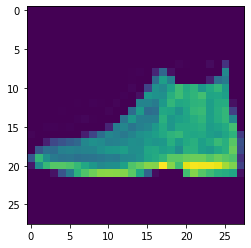

In [23]:
plt.imshow(x_test[0].reshape(28,28))
plt.show

In [24]:
sess.run(hx, {x:x_test[[0]]}) #7이라는 이미지를 주었을 때 예측값이 얼마인가

array([[4.8162884e-04, 2.6287755e-04, 4.1134752e-04, 2.7286235e-04,
        2.8213876e-04, 3.0348518e-01, 5.4275384e-04, 5.8905035e-02,
        4.3648509e-03, 6.3099134e-01]], dtype=float32)

In [25]:
sess.run(hx, {x:x_test[[0]]}).argmax(axis=1)

array([9], dtype=int64)

In [29]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(h2,y_test), dtype=tf.float32))
sess.run(accuracy,{x:x_test})

0.5864